In [1]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tweepy
from collections import Counter
from konlpy.tag import Twitter
from konlpy.tag import Kkma
import matplotlib.pyplot as plt
import re
from matplotlib import font_manager, rc #한글 깨짐 현상

In [2]:
import nltk
nltk.download()
from nltk.corpus import stopwords

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [3]:
api_key = "ylylXf2ehm9dz3b3m9oIzrE4q"
api_secret = "9YSr1xGBhaVj99XUcHkHZ47xnqi4n5tIMkhCIUQom32urHbQAH"

In [4]:
auth = tweepy.OAuthHandler(api_key, api_secret)

access_token = "1171579869047607296-JT7dgVK9ORIzkPA5Mx0uPy87AC1106"
access_token_secret = "RFT9IzxyBZrO2ghj1VE2AhP8NOLUGMjnVIm6Opim0UvWk"

In [5]:
auth.set_access_token(access_token, access_token_secret)

In [6]:
api = tweepy.API(auth)

# 예제 7.7

In [128]:
keyword = "Mers";     # 자신이 검색하고 싶은 키워드 입력 
search = [] # 크롤링 결과 저장할 변수   

In [129]:
cnt = 1
while(cnt <= 10):   # 10page 대상으로 크롤링
    tweets = api.search(keyword)
    for tweet in tweets:
        search.append(tweet)
    cnt += 1

In [130]:
print(len(search)) # 문서 길이 

150


In [131]:
#전체 문서 보기

data = {}   # 전체 문서 추가
i = 0       # 문서 번호
for tweet in search:
    data['text'] = tweet.text   # text키에 text문서 저장
    print(i, " : ", data)   # 문서번호 : 문서내용
    i += 1

0  :  {'text': 'RT @JacobCanfield: Will This Be A Severe Pandemic?\n\nSeverity is based on having both a HIGH mortality rate and a HIGH R0\n\nSARS and MERS had…'}
1  :  {'text': 'RT @nog_ak: データでみる限りMERSと新型は結構違うようなので、ドラマで描いた死亡症例が新型においても同様に発生しうるかどうかはわかりません。今回のコロナウィルス流行を機にアンナチュラルを視聴する方はご留意ください。'}
2  :  {'text': 'RT @BBCLBicker: Dr Kim Yeonjae: “In the past, with our experience with MERS, we would find the patient then quarantine the patient and loca…'}
3  :  {'text': 'The mutation could not be found in Sars, Mers or Bat-CoVRaTG13, @SCMPNews #CoronaVirus #COVID19… https://t.co/m5QkjgAc5O'}
4  :  {'text': 'Just look at the names Ebola and MERS (Middle-East Respiratory Syndrome). It has left real and tangible damage to t… https://t.co/yXFNcTkGeW'}
5  :  {'text': 'guys ye ladki h schi me true suported... mers pass videos fif rakhne ki jageh ni h phn me.. pr sine haters k mooh p… https://t.co/VMWflgDLXL'}
6  :  {'text': "@zerowondering People out here being babies. I was in South Korea during

In [132]:
# 전체 문서를 파일 저장

import os
    
wfile = open(os.getcwd()+"/MersData.txt", mode='w', encoding="utf-8")   # 쓰기 모드
data = {}   # 전체 문서 추가
i = 0       # 문서 번호

In [133]:
for tweet in search:
    data['text'] = tweet.text   # text키에 text문서 저장
    wfile.write(data['text']+'\n')  # 파일 출력
    i += 1

wfile.close()

In [134]:
file = open(os.getcwd()+'/MersData.txt', mode='r', encoding='utf-8')

In [135]:
Mers = file.readlines()

In [136]:
sentence = []
for line in Mers:
    sentence.append(line)
file.close()

In [137]:
only_english = []

for i in sentence:
    only_english.append((re.sub('[^a-zA-Z]', ' ', i)).lower())

In [138]:
words = []

for i in only_english:
    words.append(i.split())

In [139]:
# stopwords 를 제거한 토큰들
words = [w for w in words if not w in stopwords.words('english')]
print(len(words))

320


In [140]:
#stem = []

#for i in range(len(words)):
#    new = []
#    for j in range(len(words[i])):
#        new.append(stemmer.stem(words[i][j]))
#    stem.append(new)

In [141]:
#tagged = []

#for i in stem:
#    tagged.append(nltk.pos_tag(i))

In [142]:
tagged = []

for i in words:
    tagged.append(nltk.pos_tag(i))

In [143]:
nouns = []

for t in tagged:
    new = []
    for word, pos in t:
        if pos in ['NN', 'NNP']:
            new.append(word)
    nouns.append(new)

In [144]:
word = []

for n in nouns:
    new = " "
    for i in range(len(n)):
        if len(n[i]) > 3:
            new = new + str(n[i].split(",")[0]) + " "
    new = re.sub("https", "", new)
    new = re.sub("mers", "", new)
    new = re.sub("rt", "", new)
    new = re.sub("people", "", new)
    new = re.sub("now", "", new)
    new = re.sub("th", "", new)
    new = re.sub("reuters","", new)
    new = re.sub("five", "", new)
    new = re.sub("two", "", new)
    new = re.sub("latest", "", new)
    word.append(new)
    

In [145]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [146]:
import pandas as pd
import re
import networkx as nx
import matplotlib.pyplot as plt

In [147]:
from igraph import *

In [148]:
vectorizer = CountVectorizer(min_df=1)
vectorizer = vectorizer.fit(word)

X = vectorizer.transform(word)

In [149]:
X = X.toarray()

In [150]:
vectorizer.vocabulary_.keys()

dict_keys(['jacobcanfield', 'pandemic', 'severity', 'moality', 'rate', 'bbclbicker', 'yeonjae', 'past', 'experience', 'patient', 'loca', 'mutation', 'covratg', 'coronavirus', 'covid', 'qkjgac', 'look', 'respiratory', 'syndrome', 'damage', 'yxfnctkgew', 'rakhne', 'jageh', 'vmwflgdlxl', 'korea', 'didn', 'orcnx', 'hayesluk', 'timing', 'evidence', 'dubai', 'kenapa', 'harus', 'santuy', 'peama', 'angka', 'cuma', 'persen', 'lebih', 'banyak', 'karena', 'stefan', 'keemstar', 'google', 'tqrrmnj', 'drauziovarella', 'novidade', 'coronav', 'desde', 'vilavaite', 'database', 'chest', 'healmap', 'name', 'crown', 'bird', 'swine', 'sta', 'aenaa', 'spike'])

In [151]:
g = nx.Graph()
g.add_nodes_from(vectorizer.vocabulary_.keys())

In [152]:
V_list = list(vectorizer.vocabulary_.keys())

for i in range(len(V_list)):
    for j in range(len(V_list)):
        if X[i][j] == 1:
            g.add_edges_from([(V_list[i],V_list[j])])

In [153]:
nx.to_numpy_matrix(g)

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [154]:
from matplotlib import font_manager, rc #한글 깨짐 현상
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

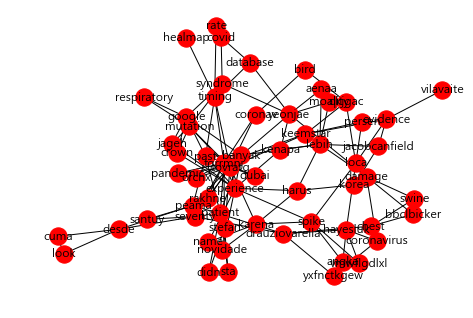

In [155]:
nx = nx.draw(g, with_labels = True,font_family = font_name)

# 예제 7.8 미완성

In [221]:
keyword = "deep learning";     # 자신이 검색하고 싶은 키워드 입력 
search = [] # 크롤링 결과 저장할 변수   

In [222]:
cnt = 1
while(cnt <= 10):   # 10page 대상으로 크롤링
    tweets = api.search(keyword)
    for tweet in tweets:
        search.append(tweet)
    cnt += 1

In [223]:
#전체 문서 보기

data = {}   # 전체 문서 추가
i = 0       # 문서 번호
for tweet in search:
    data['text'] = tweet.text   # text키에 text문서 저장
    print(i, " : ", data)   # 문서번호 : 문서내용
    i += 1

0  :  {'text': 'RT @NavishaaCloud: How Deep Learning Is Transforming Marketing #ArtificialIntelligence #learning #machinelearning via https://t.co/a3S60mPH…'}
1  :  {'text': 'How Deep Learning Is Transforming Marketing #ArtificialIntelligence #learning #machinelearning via… https://t.co/XPu893Mlaa'}
2  :  {'text': 'RT @WACommunity: Atelier Nuno Architects uses deep-blue and powder colors to create a learning playground for future doctors at Learning Co…'}
3  :  {'text': "Join us on March 12 for a free #workshop in #Portland, OR! Take a deep-dive into your organization's #data to pract… https://t.co/qKFwmeCSpd"}
4  :  {'text': 'RT @labgeni_us: Technology has disrupted nearly every industry on the planet. Why not Pharmaceuticals? And is that changing? Check out our…'}
5  :  {'text': 'RT @missy_cummings: Just more fuel for my argument as to why safety-critical systems with deep learning algorithms are immature and need to…'}
6  :  {'text': 'Research Guide for Depth Estimation with Deep Le

In [224]:
# 전체 문서를 파일 저장

import os
    
wfile = open(os.getcwd()+"/Deep Learning.txt", mode='w', encoding="utf-8")   # 쓰기 모드
data = {}   # 전체 문서 추가
i = 0       # 문서 번호

In [225]:
for tweet in search:
    data['text'] = tweet.text   # text키에 text문서 저장
    wfile.write(data['text']+'\n')  # 파일 출력
    i += 1

wfile.close()

In [226]:
file = open(os.getcwd()+'/Deep Learning.txt', mode='r', encoding='utf-8')

In [227]:
DL = file.readlines()

In [228]:
sentence = []
for line in DL:
    sentence.append(line)
file.close()

In [229]:
only_english = []

for i in sentence:
    only_english.append((re.sub('[^a-zA-Z]', ' ', i)).lower())

In [230]:
words = []

for i in only_english:
    words.append(i.split())

In [231]:
# stopwords 를 제거한 토큰들
words = [w for w in words if not w in stopwords.words('english')]
print(len(words))

180


In [232]:
tagged = []

for i in words:
    tagged.append(nltk.pos_tag(i))

In [233]:
nouns = []

for t in tagged:
    new = []
    for word, pos in t:
        if pos in ['NN', 'NNP']:
            new.append(word)
    nouns.append(new)

In [234]:
word = []

for n in nouns:
    new = " "
    for i in range(len(n)):
        if len(n[i]) > 3:
            new = new + str(n[i].split(",")[0]) + " "
    new = re.sub("https", "", new)
    new = re.sub("bdv", "", new)
    word.append(new)
    
word

[' learning artificialintelligence  ',
 ' learning artificialintelligence  mlaa ',
 ' wacommunity atelier blue powder learning playground ',
 ' join march workshop portland dive organization qkfwmecspd ',
 ' technology industry planet ',
 ' fuel argument safety learning ',
 ' research guide estimation learning guide  uaft ',
 ' scobleizer mathworksai handful list learning ',
 ' mathworksai handful list lear  elqiubtapg ',
 ' techreview world ',
 ' slide learning dlkbdf  vtbxdjrxne ',
 ' learning dozen pick knowledge ',
 ' pain illness ',
 ' ',
 ' learning fridayfeeling ',
 ' ',
 ' learning artificialintelligence  cwtkk ',
 ' learning artificialintelligence  cwtkk ',
 ' learning artificialintelligence  ',
 ' learning artificialintelligence  mlaa ',
 ' wacommunity atelier blue powder learning playground ',
 ' join march workshop portland dive organization qkfwmecspd ',
 ' technology industry planet ',
 ' fuel argument safety learning ',
 ' research guide estimation learning guide  uaft '

In [235]:
vectorizer = CountVectorizer(min_df=1)
vectorizer = vectorizer.fit(word)

X = vectorizer.transform(word)

In [236]:
X = X.toarray()

In [237]:
import networkx as nx

g = nx.Graph()
g.add_nodes_from(vectorizer.vocabulary_.keys())

In [238]:
V_list = list(vectorizer.vocabulary_.keys())

for i in range(len(V_list)):
    for j in range(len(V_list)):
        if X[i][j] == 1:
            g.add_edges_from([(V_list[i],V_list[j])])

In [239]:
nx.to_numpy_matrix(g)

matrix([[0., 1., 0., ..., 0., 1., 0.],
        [1., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 1., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

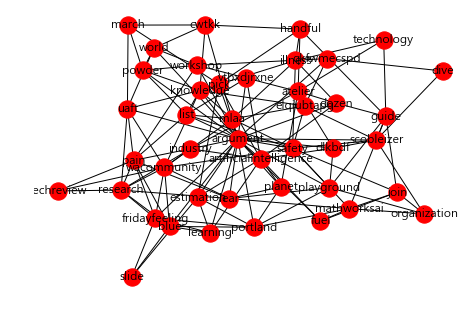

In [240]:
nx = nx.draw(g, with_labels = True,font_family = font_name)